<a href="https://colab.research.google.com/github/ShreyWey/Stock-Prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
# Stock Price Prediction with LSTM

## Overview

This project focuses on predicting stock prices using historical data from Yahoo Finance. The key steps involve fetching stock data, preprocessing the data using MinMax scaling, and training a Long Short-Term Memory (LSTM) model to make predictions based on past prices.

### Features
- **Company Data**: Fetch stock data from Yahoo Finance for any given company using its ticker symbol.
- **Data Preprocessing**: Scales stock prices to a range suitable for machine learning models.
- **LSTM Model**: A sequential LSTM model is used to predict stock prices based on historical data.
- **Visualization**: Compares original stock prices with the predicted values to show the performance of the model.

## Getting Started

### Prerequisites
You will need the following libraries:
- `ipywidgets`
- `yfinance`
- `numpy`
- `keras`
- `matplotlib`
- `sklearn`

Install them using pip:
```bash
pip install yfinance ipywidgets numpy keras matplotlib scikit-learn
```

### Running the Project
1. **Input Parameters**:
   - Company ticker (e.g., AAPL for Apple).
   - Start and end dates for the data you wish to fetch.

2. **Fetch Data**:
   Use Yahoo Finance to download stock data for the selected time range.

3. **Preprocess the Data**:
   Scale the stock prices and split the data into training and testing sets.

4. **Train the Model**:
   The LSTM model is trained on the scaled data with two LSTM layers and a Dense output layer.

5. **Predict Stock Prices**:
   Use the trained model to predict future stock prices and compare them with actual values.

6. **Plot the Results**:
   Visualize the actual stock prices and the predicted values to assess the model's performance.

## Code Workflow

1. **Input Widgets**:
   Collect company name, start date, and end date using `ipywidgets`.

2. **Fetch Stock Data**:
   Download stock data using Yahoo Finance:
   ```python
   stock_data = yf.download(company, start=start, end=end)
   ```

3. **Preprocess**:
   - Scale the closing prices using `MinMaxScaler`.
   - Create datasets for model training.

4. **LSTM Model**:
   A sequential LSTM model is trained for 10 epochs with the following architecture:
   ```python
   model = Sequential()
   model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
   model.add(LSTM(units=64))
   model.add(Dense(units=64))
   model.add(Dense(units=1))
   ```

5. **Evaluate and Predict**:
   After training, predictions are made and visualized:
   ```python
   plt.plot(original_data, label='Original Data')
   plt.plot(predicted_data, label='Predicted Data')
   plt.legend()
   plt.show()
   ```

## Model Performance

The model's loss during training and evaluation is printed after each epoch. The predictions are inverse transformed to match the original scale of stock prices and are plotted against the actual stock prices for visualization.

## Conclusion

This project demonstrates how to use an LSTM model to predict stock prices based on historical data. The model is able to capture trends and make accurate predictions over a given time period.
'''


In [3]:
import ipywidgets as widgets
from IPython.display import display
import datetime
import yfinance as yf

company_name = widgets.Text(description="Company Name:", placeholder="Enter company ticker")
start_date = widgets.DatePicker(description='Start Date:', value=datetime.date.today())
end_date = widgets.DatePicker(description='End Date:', value=datetime.date.today())

submit_button = widgets.Button(description="Submit")

display(company_name, start_date, end_date, submit_button)

def on_button_click(b):
    company = company_name.value
    start = start_date.value.strftime('%Y-%m-%d')  # Convert to 'YYYY-MM-DD' string format
    end = end_date.value.strftime('%Y-%m-%d')      # Convert to 'YYYY-MM-DD' string format

    print(f"Fetching data for {company} from {start} to {end}...")

    stock_data = yf.download(company, start=start, end=end)

submit_button.on_click(on_button_click)


Text(value='', description='Company Name:', placeholder='Enter company ticker')

DatePicker(value=datetime.date(2024, 9, 14), description='Start Date:')

DatePicker(value=datetime.date(2024, 9, 14), description='End Date:')

Button(description='Submit', style=ButtonStyle())

Fetching data for AAPL from 2001-06-11 to 2024-09-14...


[*********************100%***********************]  1 of 1 completed


In [4]:
import yfinance as yf

stock_data = yf.download(company_name.value, start_date.value, end_date.value)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-11,0.375893,0.376250,0.356250,0.357857,0.302201,294000000
2001-06-12,0.353036,0.369464,0.352857,0.362679,0.306273,303794400
2001-06-13,0.382500,0.388036,0.358214,0.365536,0.308686,511487200
2001-06-14,0.357857,0.365179,0.353036,0.355000,0.299789,297348800
2001-06-15,0.358929,0.370536,0.345536,0.365000,0.308233,454624800
...,...,...,...,...,...,...
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [6]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [7]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0018
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 1.4287e-05
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 1.5096e-05
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 1.5499e-05
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 1.3291e-05
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 1.2771e-05
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 1.3637e-05
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 1.1321e-05
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 1.2428e-05
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - loss: 1.0987e-05


In [10]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.1796e-04
Test Loss: 0.00047766283387318254


In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


In [12]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

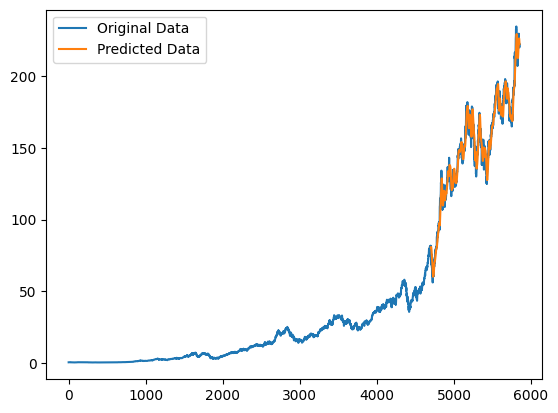

In [13]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [14]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([171.2403717 , 172.76028442, 174.45579529, 176.1867218 ,
       177.95593262, 179.53213501, 181.10253906, 182.63502502,
       184.19630432, 185.67855835, 187.01596069, 188.24830627,
       189.41316223, 190.35432434, 190.81835938, 191.15133667,
       191.35644531, 191.47930908, 191.60122681, 191.77157593,
       192.07626343, 192.46379089, 192.98150635, 193.45239258,
       194.02778625, 194.37127686, 195.4931488 , 197.40446472,
       199.78712463, 202.21887207, 204.81846619, 207.18605042,
       208.94880676, 210.06434631, 210.72250366, 211.08596802,
       211.50088501, 211.95863342, 212.17741394, 212.64614868,
       213.45423889, 214.50683594, 215.97059631, 217.69163513,
       219.52597046, 221.60157776, 223.32162476, 224.91900635,
       226.57069397, 228.15979004, 229.20576477, 229.53562927,
       229.39161682, 228.90725708, 228.29206848, 227.18463135,
       225.77627563, 224.28355408, 222.83782959, 221.5461731 ,
       220.65232849, 219.8139801 , 219.18464661, 218.01

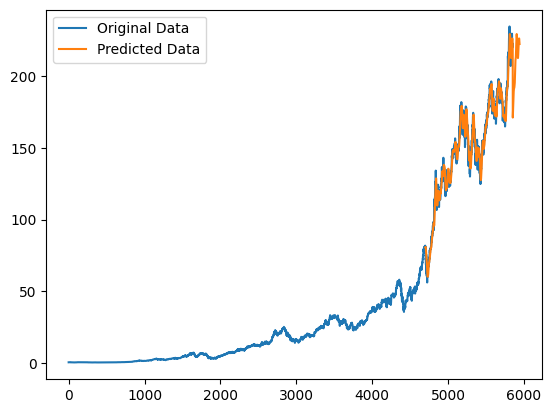

In [15]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()